# Artificial Neural Network

## Part 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from pathlib import Path
import pickle

## Part 2 - Data Preprocessing

In [2]:
#Access input folder
current_dir = Path.cwd()
input_dir1 = Path ("G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2_train =  [folder_input for folder_input in input_dir1.iterdir() if folder_input.is_dir()]
print ("2",input_dir2_train)

input G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset
2 [WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_1'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_13'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_17'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_21'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_25'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_29'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_33'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_37'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_hist

In [3]:
# Access each folder inside input folder
dataset_train = pd.DataFrame(columns = ['Mass', 'Standoff distance', 'Time', 'Phase', 'Pressure'])
df_list_train = []
for folder_train in input_dir2_train:
    
    # Make a list of data file names
    files_train = list(file_train for file_train in folder_train.rglob("*.xlsx") if 2 < int(file_train.stem[1:]) < 14)
    print ("folder", folder_train)
    
    for file_train in files_train:
        df_list_train.append(pd.read_excel(file_train))
        print (file_train.stem)

dataset_train = pd.concat(df_list_train, ignore_index = True)

folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1
P13
P5
P9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_13
P13
P5
P9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_17
P13
P5
P9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_21
P13
P5
P9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_25
P13
P5
P9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_29
P13
P5
P9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_33
P13
P5
P9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_37
P13
P5
P9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_41
P13
P5
P9
folder G:\Chamodi\LSDYNA_1D\Incident_p

In [7]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9831 entries, 0 to 9830
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               9831 non-null   float64
 1   Standoff distance  9831 non-null   int64  
 2   Time               9831 non-null   float64
 3   Pressure           9831 non-null   float64
 4   Phase_negative     9831 non-null   uint8  
 5   Phase_positive     9831 non-null   uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 326.5 KB


In [5]:
dataset_train = pd.get_dummies(dataset_train, columns =['Phase'], dtype = np.uint8)
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9831 entries, 0 to 9830
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               9831 non-null   float64
 1   Standoff distance  9831 non-null   int64  
 2   Time               9831 non-null   float64
 3   Pressure           9831 non-null   float64
 4   Phase_negative     9831 non-null   uint8  
 5   Phase_positive     9831 non-null   uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 326.5 KB


In [6]:
dataset_train.head(30)

,Mass,Standoff distance,Time,Pressure,Phase_negative,Phase_positive
0,0.5,7,15.879823,12.668398,0,1
1,0.5,7,15.889702,12.057688,0,1
2,0.5,7,15.899993,12.399805,0,1
3,0.5,7,15.909873,12.217992,0,1
4,0.5,7,15.919754,12.204156,0,1
5,0.5,7,15.939925,12.051352,0,1
6,0.5,7,15.949804,12.006086,0,1
7,0.5,7,15.959684,11.929445,0,1
8,0.5,7,16.039958,11.425992,0,1
9,0.5,7,16.169632,10.629063,0,1


In [6]:
y = dataset_train['Pressure']
X = dataset_train.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(9831, 5) (9831,)


In [8]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
X_train[:,0:3] = sc.transform(X_train[:, 0:3])
print (X_train)

[[-1.74299536 -1.02773248 -0.66588717  1.          0.        ]
 [ 1.33279509  0.12424162  1.93397794  1.          0.        ]
 [ 1.14055819 -1.02773248  1.74883837  1.          0.        ]
 ...
 [ 0.37161058  0.12424162  0.11814384  1.          0.        ]
 [-0.20510013  0.12424162 -0.44991289  1.          0.        ]
 [-0.39733703  0.12424162 -0.97260212  0.          1.        ]]


In [13]:
X_test[:,0:3] = sc.transform(X_test[:,0:3])
print (X_test)

[[-0.97404774  1.27621572  1.82053595  1.          0.        ]
 [-1.55075845  0.12424162  0.84957369  1.          0.        ]
 [-0.78181084  0.12424162 -0.44808487  1.          0.        ]
 ...
 [-0.78181084  1.27621572  1.50293013  1.          0.        ]
 [-0.78181084 -1.02773248  0.86134755  1.          0.        ]
 [ 1.525032    0.12424162 -0.5216054   1.          0.        ]]


In [14]:
X_val[:,0:3] = sc.transform(X_val[:,0:3])
print (X_val)

[[ 1.33279509  0.12424162 -0.56242685  1.          0.        ]
 [ 0.37161058 -1.02773248  0.77334114  1.          0.        ]
 [ 0.56384748 -1.02773248 -1.52434107  0.          1.        ]
 ...
 [-0.97404774 -1.02773248  0.25153533  1.          0.        ]
 [-1.16628465  1.27621572 -0.53429707  0.          1.        ]
 [-1.35852155 -1.02773248 -1.31199762  0.          1.        ]]


In [15]:
print ("X_train", len(X_train))
print ("X_test", len(X_test))
print ("X_val", len(X_val))

X_train 5898
X_test 1967
X_val 1966


## Part 3 - Building the ANN

In [15]:
ann = tf.keras.models.Sequential()

In [16]:
ann.add(tf.keras.layers.Dense(units=150,
                              input_shape=(X_train.shape[1],),
                              activation='softplus'))
ann.add(tf.keras.layers.Dense(units=125,
                              activation='softplus'))
ann.add(tf.keras.layers.Dense(units=100,
                              activation='softplus'))
ann.add(tf.keras.layers.Dense(units=75,
                              activation='softplus'))

In [17]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [18]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               900       
                                                                 
 dense_1 (Dense)             (None, 125)               18875     
                                                                 
 dense_2 (Dense)             (None, 100)               12600     
                                                                 
 dense_3 (Dense)             (None, 75)                7575      
                                                                 
 dense_4 (Dense)             (None, 1)                 76        
                                                                 
Total params: 40,026
Trainable params: 40,026
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

In [19]:
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [20]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [21]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
372/372 [==============================] - 36s 94ms/step - loss: 4898.6772 - mae: 27.4615 - val_loss: 3046.3796 - val_mae: 21.3059
Epoch 2/500
372/372 [==============================] - 4s 9ms/step - loss: 3970.1692 - mae: 23.2758 - val_loss: 2928.9399 - val_mae: 20.4756
Epoch 3/500
372/372 [==============================] - 4s 10ms/step - loss: 3985.2729 - mae: 22.7147 - val_loss: 3502.1609 - val_mae: 24.7896
Epoch 4/500
372/372 [==============================] - 4s 10ms/step - loss: 3758.7607 - mae: 21.4524 - val_loss: 3479.8745 - val_mae: 19.3583
Epoch 5/500
372/372 [==============================] - 2s 6ms/step - loss: 3790.9556 - mae: 21.1265 - val_loss: 2729.2253 - val_mae: 19.3391
Epoch 6/500
372/372 [==============================] - 4s 10ms/step - loss: 3670.4006 - mae: 20.7863 - val_loss: 2662.8508 - val_mae: 18.2555
Epoch 7/500
372/372 [==============================] - 4s 10ms/step - loss: 3707.8506 - mae: 20.7626 - val_loss: 2567.2461 - val_mae: 18.0360
Epoch 8

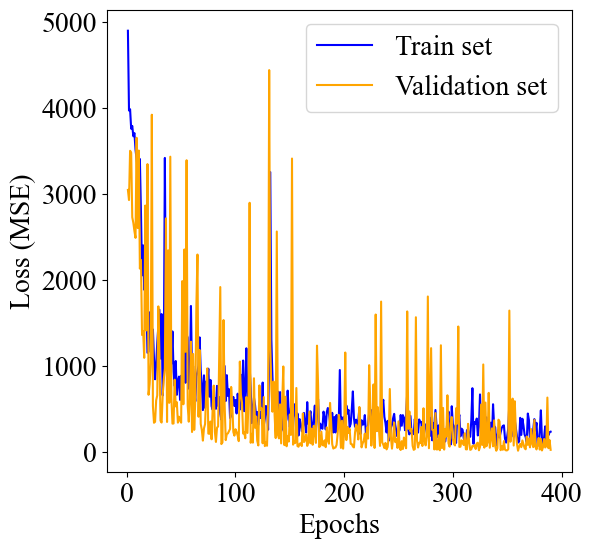

In [22]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

# Set global font to Times New Roman and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20

# Create a plot
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_values, 'blue', label='Train set')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set')
#plt.title('Training and testing loss')


plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Section2_ANN5_2.png', dpi=200, bbox_inches='tight')
plt.show()

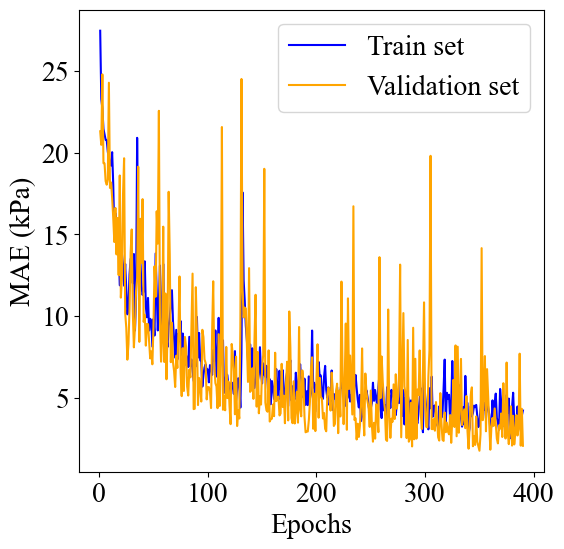

In [23]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
# Create a plot
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_values1, 'blue', label='Train set')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE (kPa)')
plt.legend()
plt.savefig('Section2_ANN5_3.png', dpi=200, bbox_inches='tight')
plt.show()

In [24]:
print (epochs)

range(1, 391)


In [25]:
ann.save('Section2_new_ANN_5')
import pickle
pickle.dump(sc, open('Section2_new_scaler_ANN_5.pkl', 'wb'))

INFO:tensorflow:Assets written to: Section2_new_ANN_5\assets


## Part 5 - Make predictions

117/117 [==============================] - 0s 2ms/step


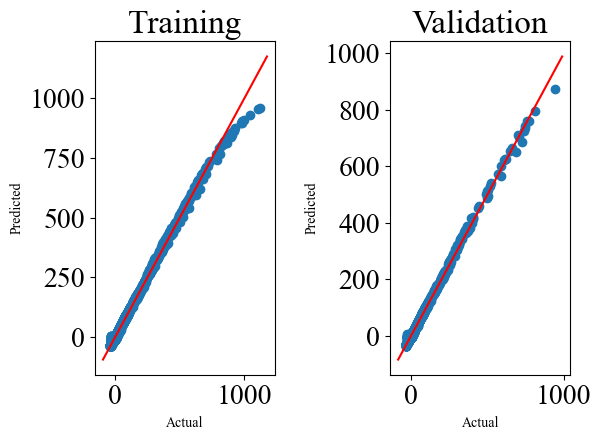

In [26]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()
plt.savefig('Section2_ANN5_1.png', dpi=200, bbox_inches='tight')
# show the plot
plt.show()

In [16]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

62/62 [==============================] - 36s 571ms/step
[[ -0.93   0.05]
 [ -0.35   1.2 ]
 [-19.92 -20.14]
 ...
 [ -1.35  -0.57]
 [ -1.75  -0.46]
 [-29.36 -29.01]]


Text(0, 0.5, 'Predicted data')

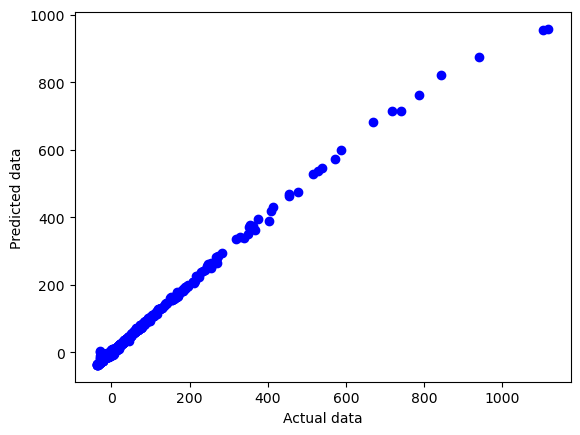

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

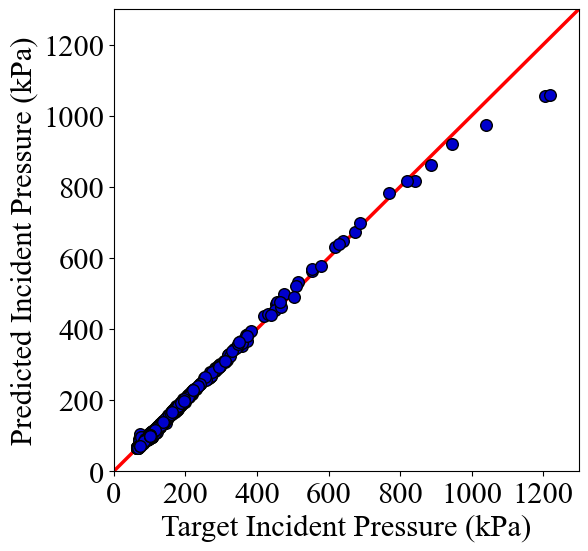

In [25]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Set global font to Times New Roman and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 25

b_l = 0
u_l = 1300

# Add scatterplot
ax1.scatter(y_test+101.25, y_pred+101.25, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Incident Pressure (kPa)', fontsize = 22)
plt.xlabel('Target Incident Pressure (kPa)', fontsize = 22)
plt.xticks([0, 200, 400, 600, 800, 1000, 1200],fontsize = 22)
plt.yticks([0, 200, 400, 600, 800, 1000, 1200],fontsize = 22)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon = False, fontsize = 25)

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

plt.savefig('Section2_ANN5_new.png', dpi=200, bbox_inches='tight')

In [30]:
# metrics
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

349/349 [==============================] - 1s 3ms/step
1.9506528997554078
2.1021805815903036


In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test+101.25, y_pred+101.25)
print (r2)

0.9943257405133618


In [32]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9968556750510447


In [33]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 14.85%
Within 10% margin 20.43%
Within 20% margin 22.77%
Out of 20% margin 77.23%


In [22]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9943112727431256


In [23]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test+101.25, y_pred+101.25))

6.170179342016747

In [24]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test+101.25, y_pred+101.25)

2.0424741334765626

In [11]:
ann = load_model('Section2_new_ANN_5')
sc = pickle.load(open('Section2_new_scaler_ANN_5.pkl', 'rb'))